In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [108]:
train = pd.read_csv("ETData.csv")

In [109]:
train = train.fillna(train.median())

In [110]:
X = train[['Years of Experience']].values
Y = train[["Salary"]].values.reshape(-1, 1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(Y)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

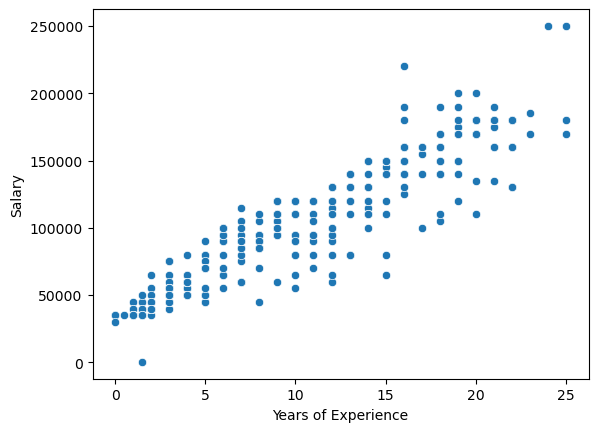

In [111]:
sns.scatterplot(train['Years of Experience'],train["Salary"])

In [112]:
class Linear_Regression():

    # Initiating the parameters.
    def __init__(self, learning_rate, no_of_itr):
        self.learning_rate = learning_rate
        self.no_of_itr = no_of_itr

    def fit(self, X, Y):

        # No. of training examples and no. of features.
        self.m, self.n = X.shape     # Number of rows and columns
        # Initiating the weight and bias
        self.w = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        # Gradient descent for number of iterations.
        for i in range(self.no_of_itr):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # Calculating gradients
        dw = -(self.X.T).dot(self.Y - Y_prediction)/self.m

        db = -np.sum(self.Y - Y_prediction)/self.m

        # Updating weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

    def print_weights(self):
        print('Weights for the respective features are :')
        print(self.w)
        print()

        print('Bias value for the regression is:', self.b)
        print()

In [113]:
import matplotlib.pyplot as plt

Weights for the respective features are :
[[6844.32101273]]

Bias value for the regression is: 15393.529690541727



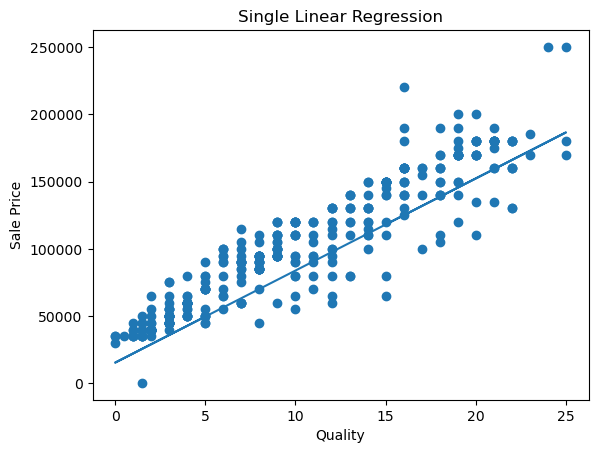

In [116]:
model = Linear_Regression(learning_rate=0.03, no_of_itr=30000)
model.fit(x_scaled, y_scaled)
model.print_weights()

plt.scatter(X, Y)
plt.plot(X, model.predict(X))
plt.xlabel('Quality')
plt.ylabel('Sale Price')
plt.title('Single Linear Regression')
plt.show()